# <u>Heart Disease Prediction</u>

<u>Abstract:</u>
    
    Heart disease is easier to treat when it is detected in the early stages. Machine learning techniques may aid a more efficient analysis in the prediction of the disease. Moreover, this prediction is one of the most central problems in medicine, as it is one of the leading diseases related to an unhealthy lifestyle. So, an early prediction of this disease will be useful for a cure or aversion.


<u>Problem Statement:</u>
    
    Analyze the heart disease dataset to explore the machine learning algorithms and build decision tree model to predict the disease.


<u>Dataset Information:</u>
    
    Each attribute in the heart disease dataset is a medical risk factor.
    
<u>Variable Description:</u>

<table>
<tbody>
<tr>
<td width="154">
<p><strong><u>Column</u></strong></p>
</td>
<td width="446">
<p><strong><u>Description</u></strong></p>
</td>
</tr>
<tr>
<td width="154">
<p>age</p>
</td>
<td width="446">
<p>Age of the patient</p>
</td>
</tr>
<tr>
<td width="154">
<p>gender</p>
</td>
<td width="446">
<p>Gender of the patient - (0,1) - (Male, Female)</p>
</td>
</tr>
<tr>
<td width="154">
<p>chest_pain</p>
</td>
<td width="446">
<p>It refers to the chest pain experienced by the patient -(0,1,2,3)</p>
</td>
</tr>
<tr>
<td width="154">
<p>rest_bps</p>
</td>
<td width="446">
<p>Blood pressure of the patient while resting(in mm/Hg)</p>
</td>
</tr>
<tr>
<td width="154">
<p>cholesterol</p>
</td>
<td width="446">
<p>Patient's cholesterol level (in mg/dl)</p>
</td>
</tr>
<tr>
<td width="154">
<p>fasting_blood_sugar</p>
</td>
<td width="446">
<p>The blood sugar of the patient while fasting</p>
</td>
</tr>
<tr>
<td width="154">
<p>rest_ecg</p>
</td>
<td width="446">
<p>Potassium level (0,1,2)</p>
</td>
</tr>
<tr>
<td width="154">
<p>thalach</p>
</td>
<td width="446">
<p>The patient&rsquo;s maximum heart rate</p>
</td>
</tr>
<tr>
<td width="154">
<p>exer_angina</p>
</td>
<td width="446">
<p>It refers to exercise-induced angina - (1=Yes, 0=No)</p>
</td>
</tr>
</tbody>
</table>
<table>
<tbody>
<tr>
<td width="154">
<p>old_peak</p>
</td>
<td width="446">
<p>It is the ST depression induced by exercise relative to rest(ST relates to the position on ECG plots)</p>
</td>
</tr>
<tr>
<td width="154">
<p>slope</p>
</td>
<td width="446">
<p>It refers to the slope of the peak of the exercise ST-Segment- (0,1,2)</p>
</td>
</tr>
<tr>
<td width="154">
<p>ca</p>
</td>
<td width="446">
<p>Number of major vessels - (0,1,2,3,4)</p>
</td>
</tr>
<tr>
<td width="154">
<p>thalassemia</p>
</td>
<td width="446">
<p>It refers to thalassemia which is a blood disorder - (0,1,2,3)</p>
</td>
</tr>
<tr>
<td width="154">
<p>target</p>
</td>
<td width="446">
<p>The patient has heart disease or not - (1=Yes, 0=No)</p>
</td>
</tr>
</tbody>
</table>




<u>Scope:</u>
    
    Understand data by performing exploratory data analysis
    Training and building classification algorithms to predict heart disease
    Understand various model performance metrics and measure the performance of each model


<u>Learning Outcome:</u>
    
    The students should be able to predict heart disease from medical records with the help of classification models. They should also be able to perform EDA and re-build the model and check if there is any significant change in the predictive scores.


Lets start by importing necessary libraries

In [1]:
# to load the dataset
import pandas as pd
# For EDA
import matplotlib.pyplot as plt
import seaborn as sns
# Override pyplot settings by seaborn theme
sns.set()
# for necessary computation and evaluation
import numpy as np
# To display maximum columns
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'HeartDisease.csv',header = 0)

Dataframe basic analysis

In [3]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe(include='all')

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

    From the above analysis,
    we see that the dataset has no categorical variables
    The data set has no missing values
    The target variable has 2 classes for prediction

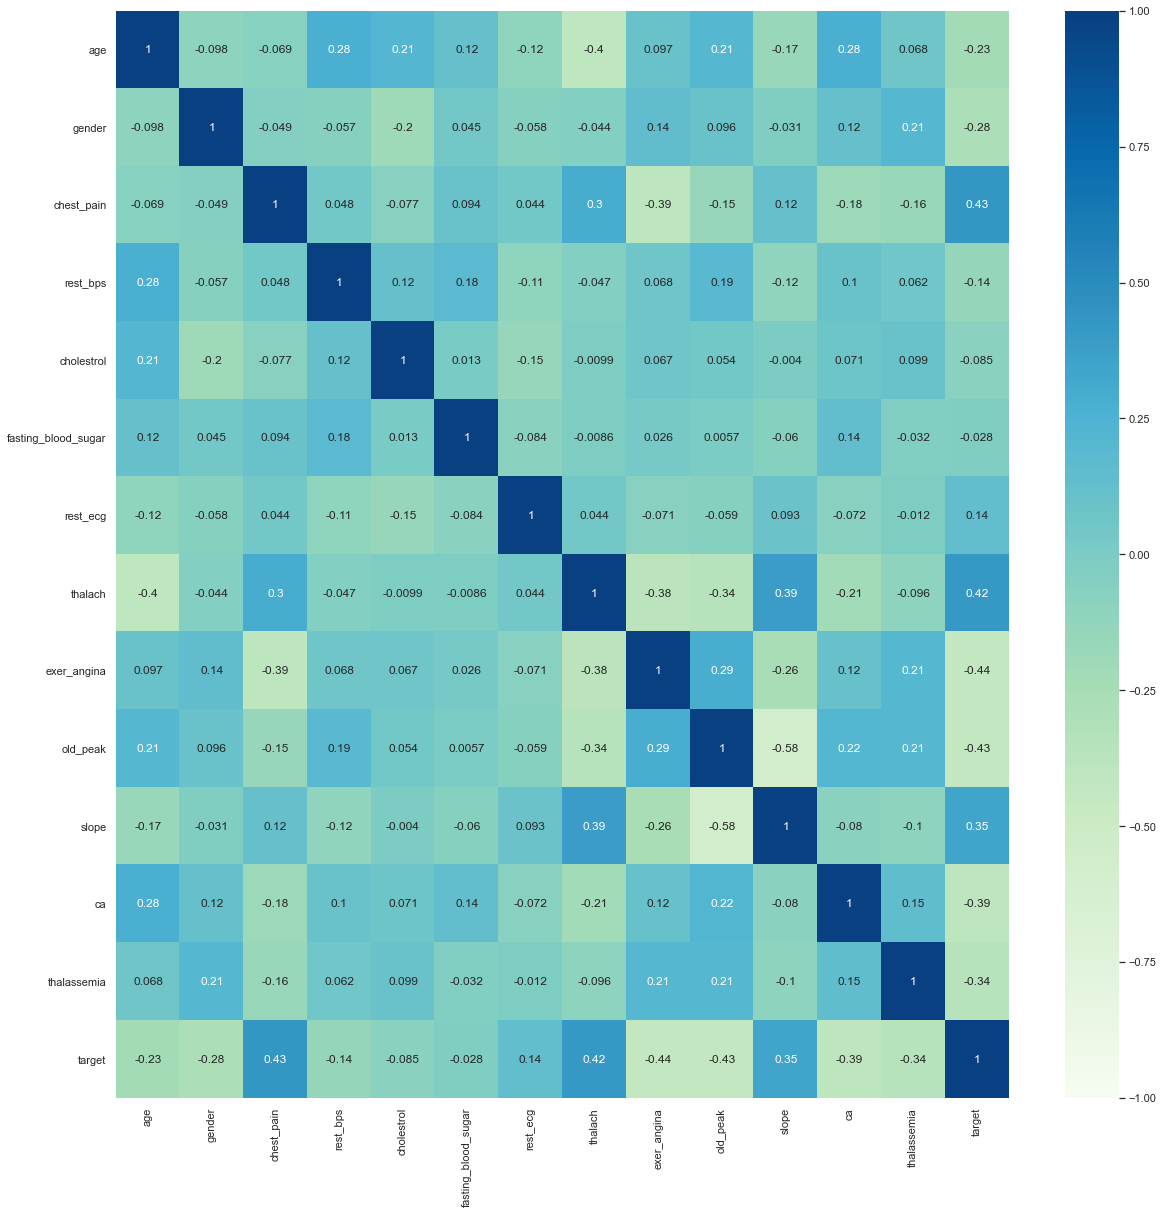

In [8]:
# Plotting a heatmap between the variables of dataset
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, vmin = -1, vmax = 1, cmap = 'GnBu' )
plt.show()

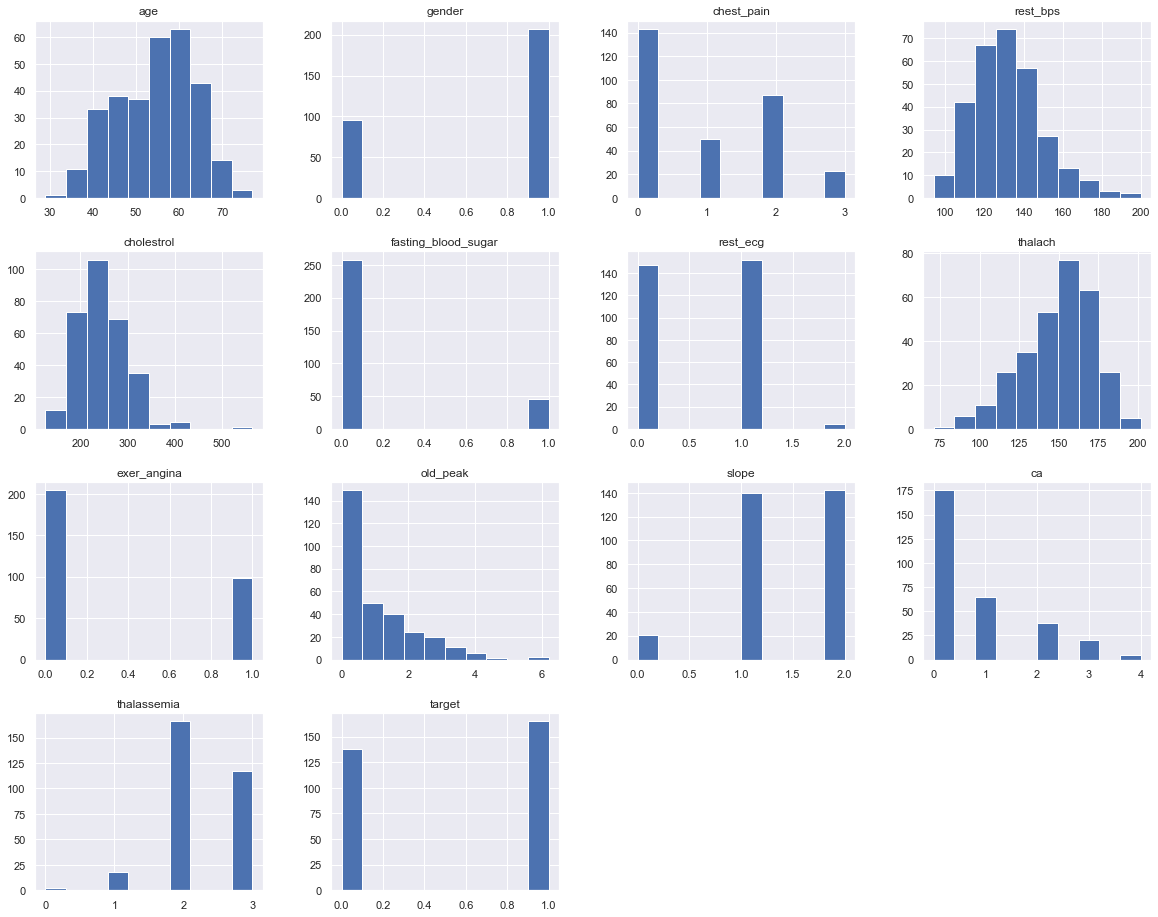

In [9]:
df.hist(figsize=(20,16))
plt.show()

    This is a histogram plot.

    This also depicts the counts of each value of each column. Here we can see the imblances in data too

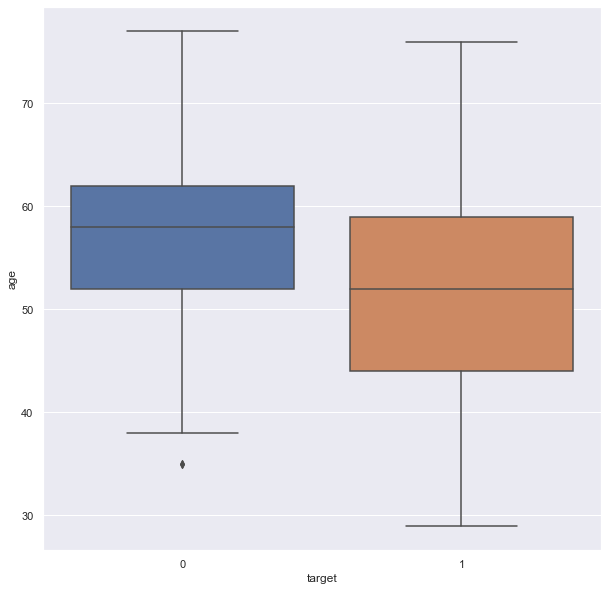

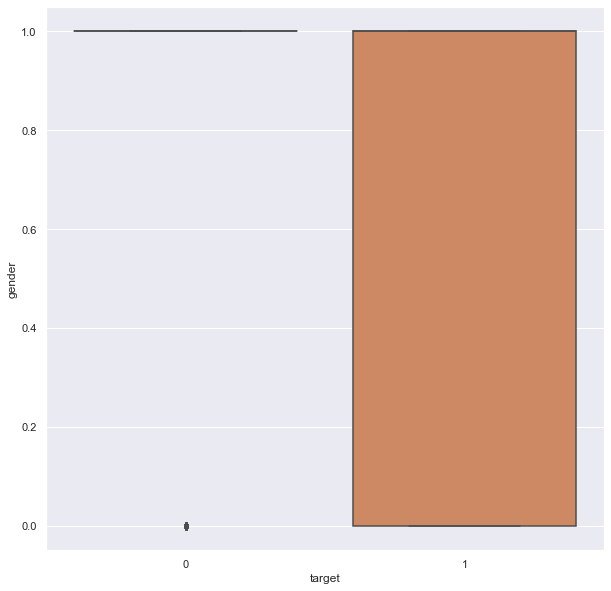

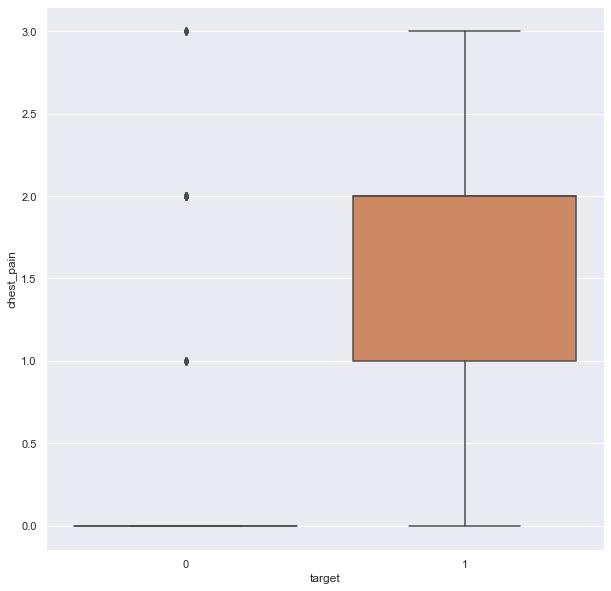

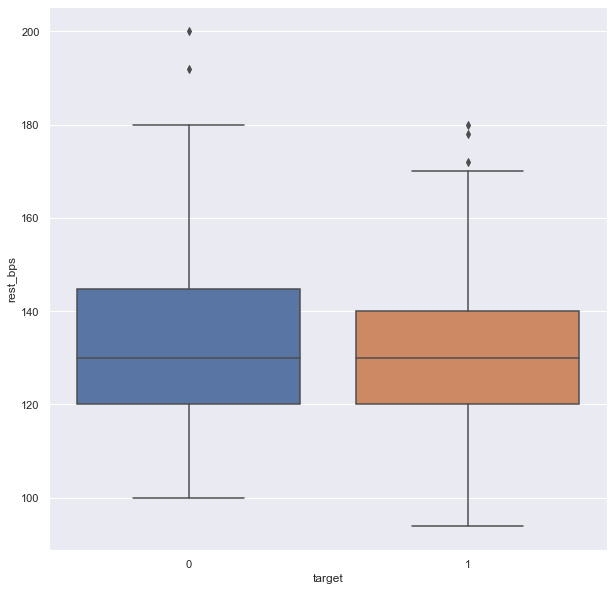

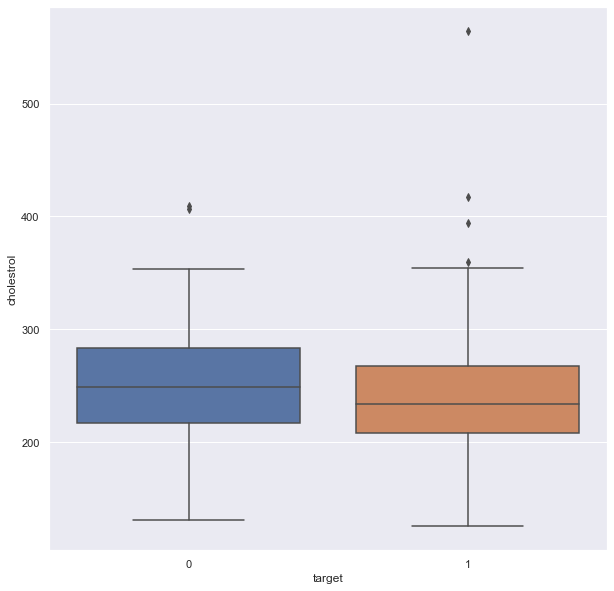

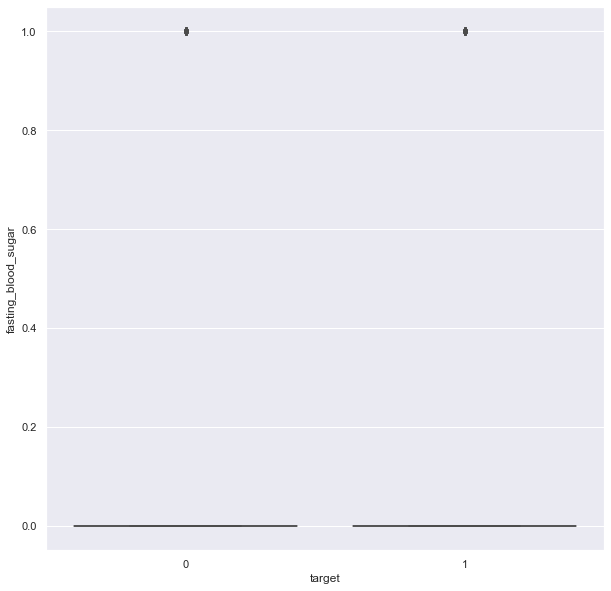

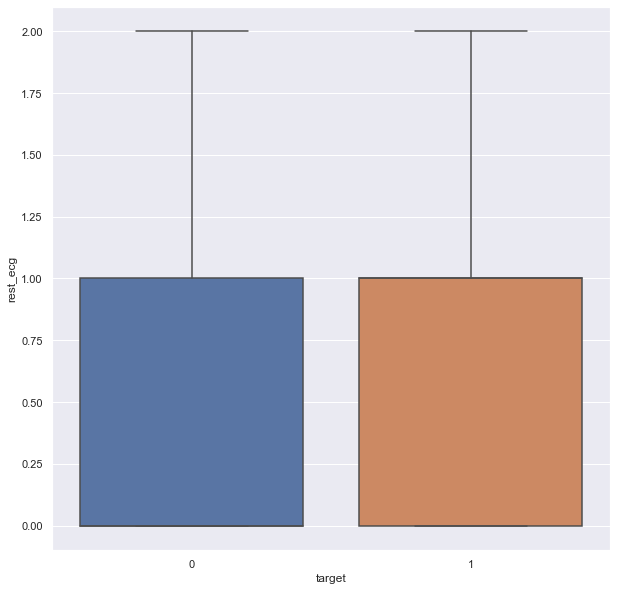

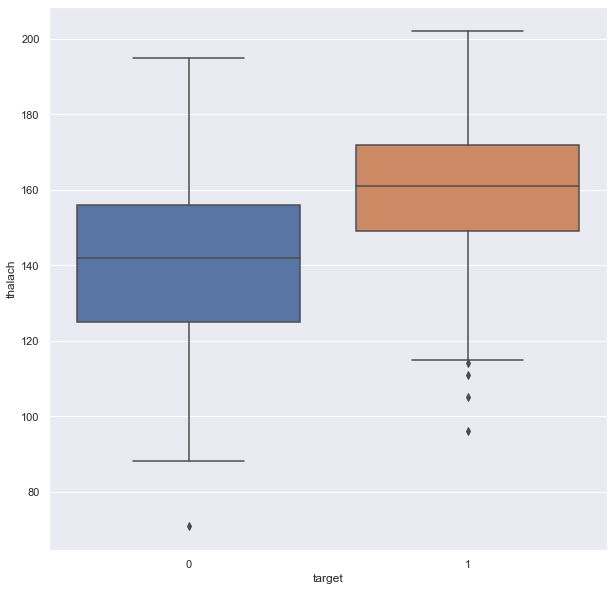

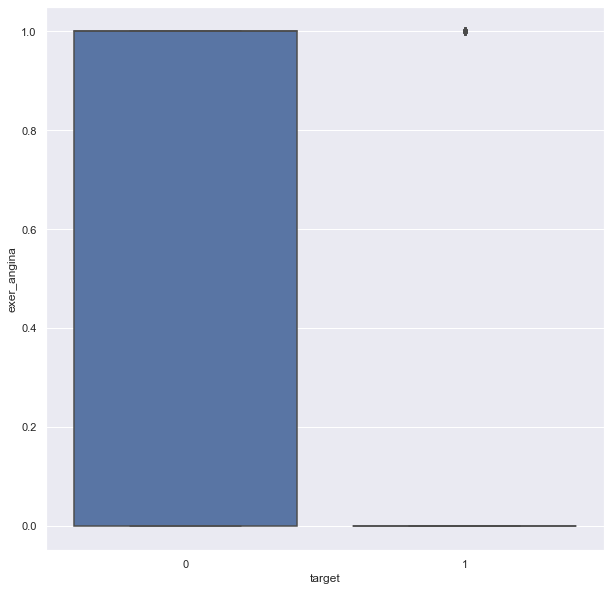

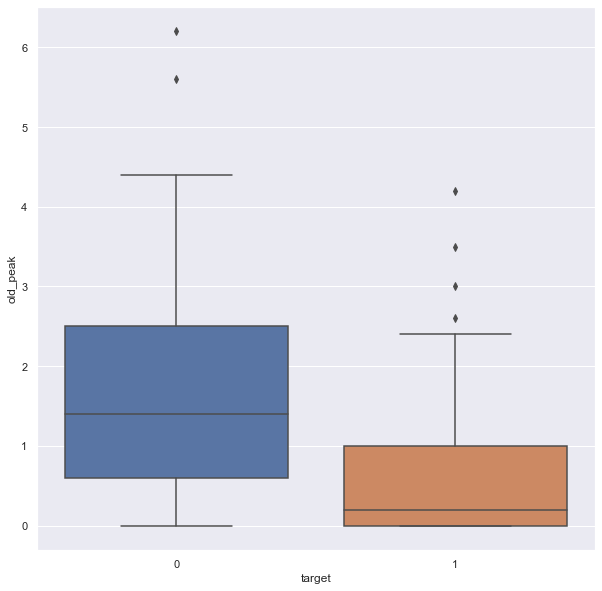

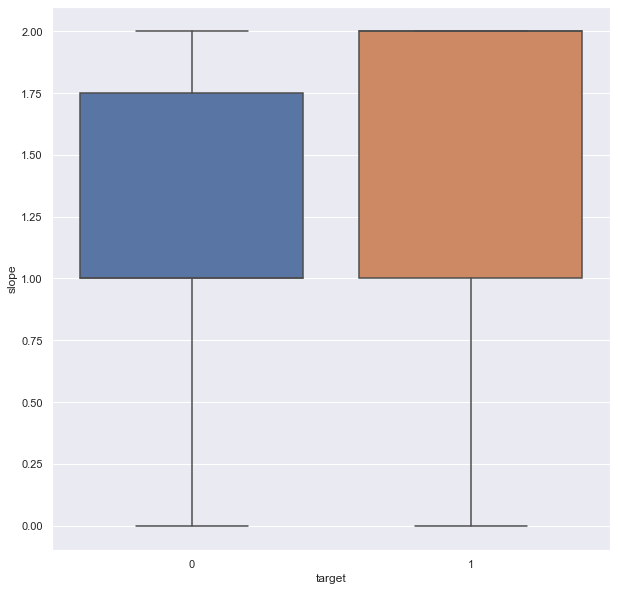

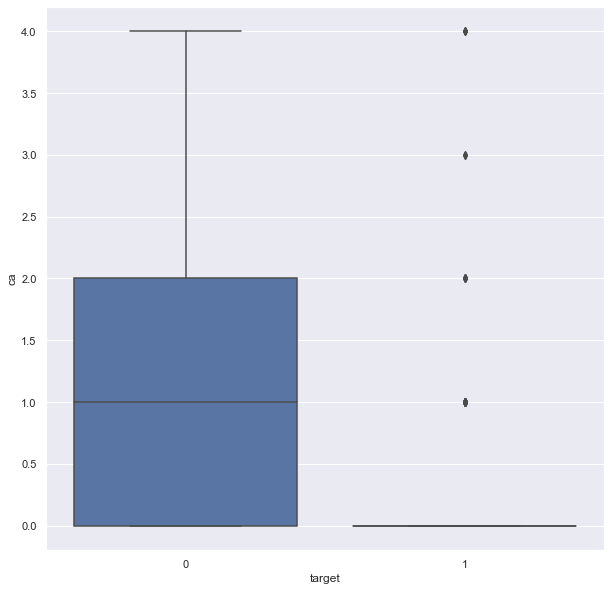

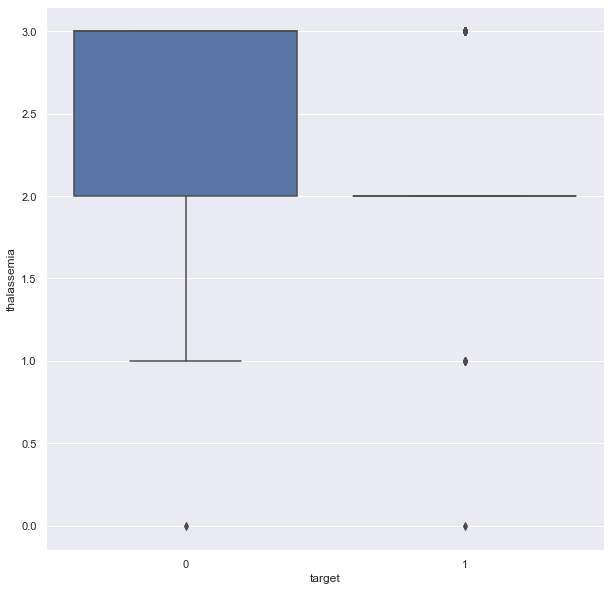

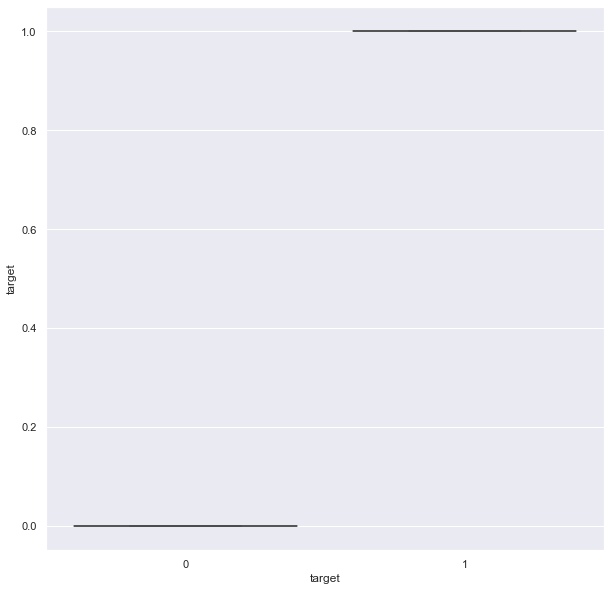

In [10]:
for col_name in df.columns:
    #plot size
    plt.figure(figsize=(10,10))
    sns.boxplot(df['target'],df[col_name])

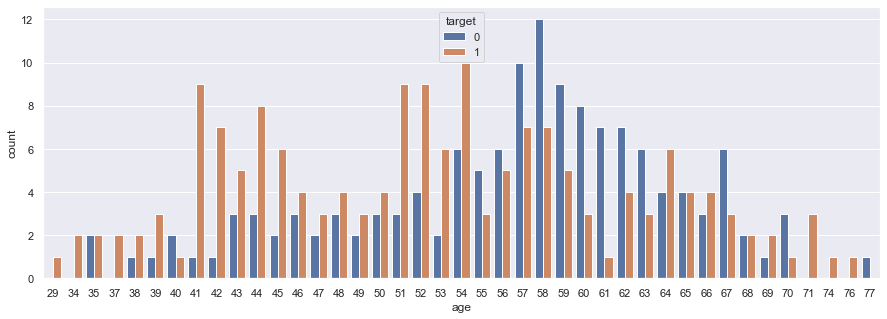

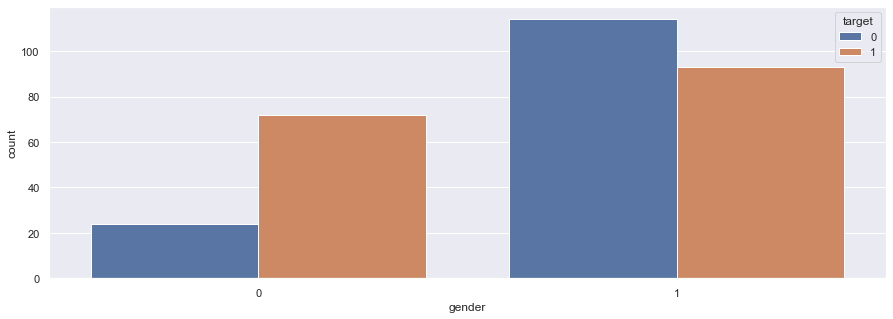

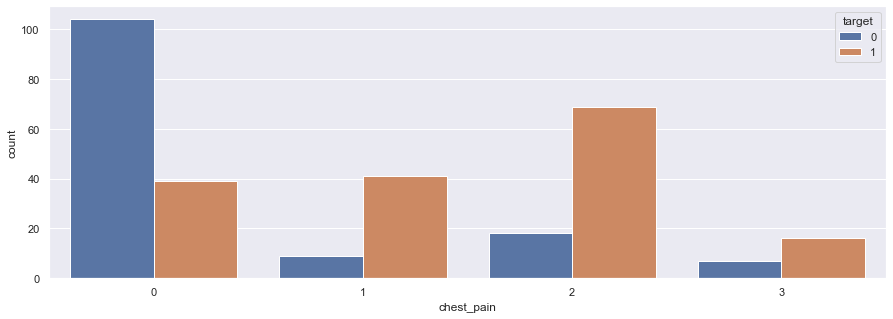

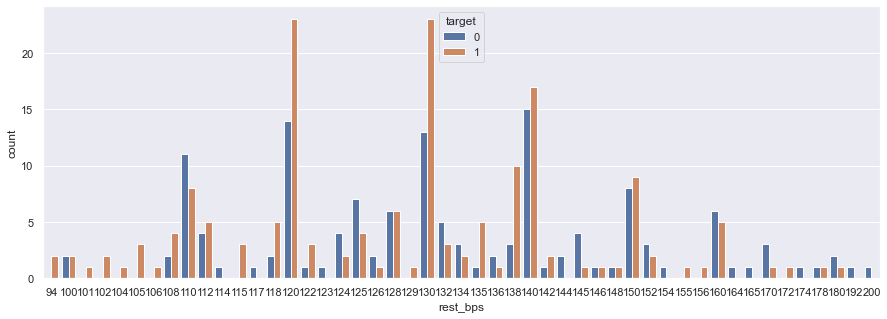

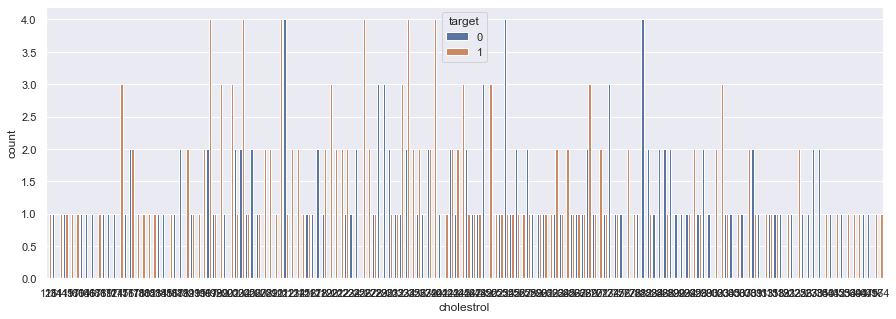

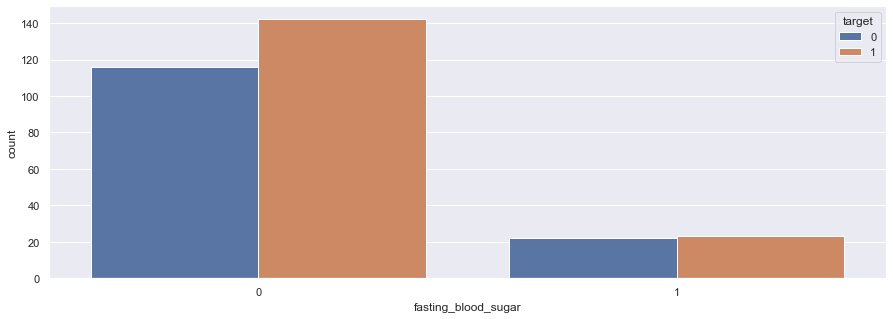

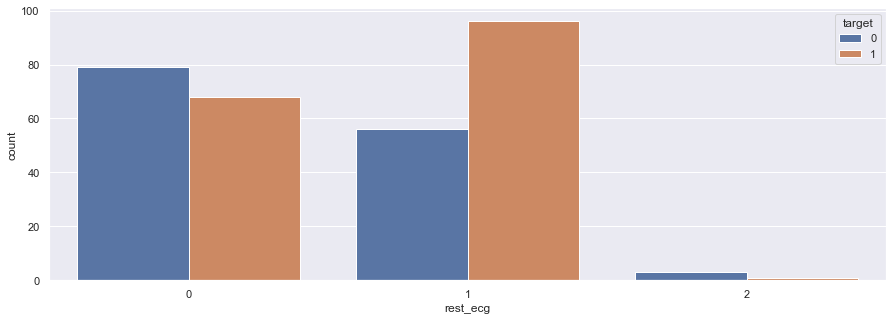

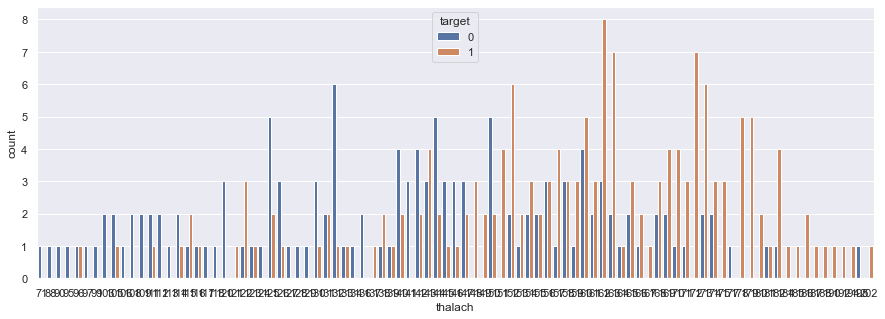

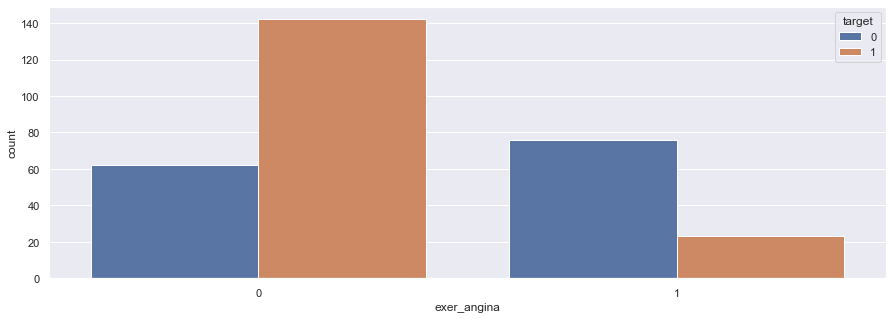

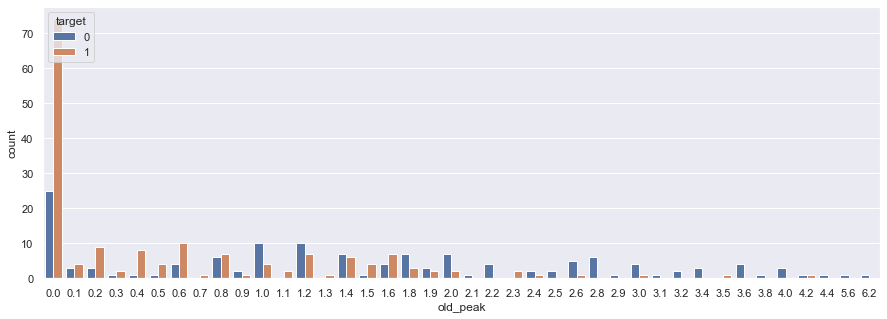

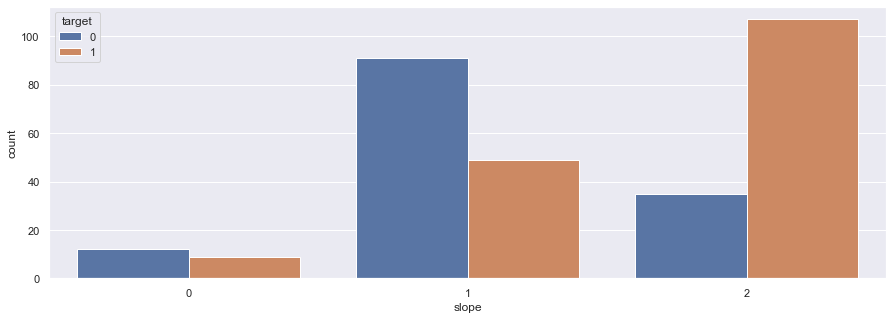

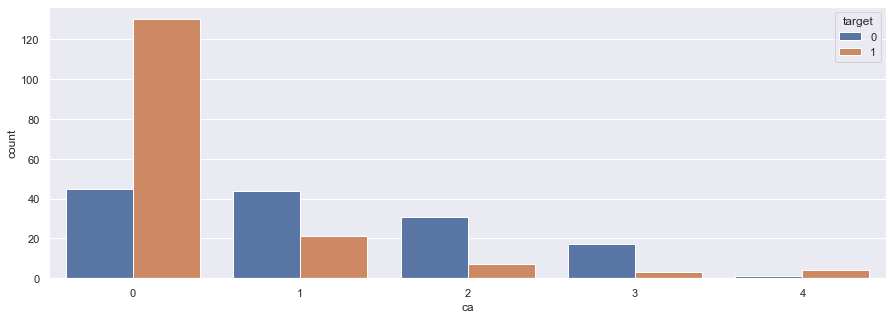

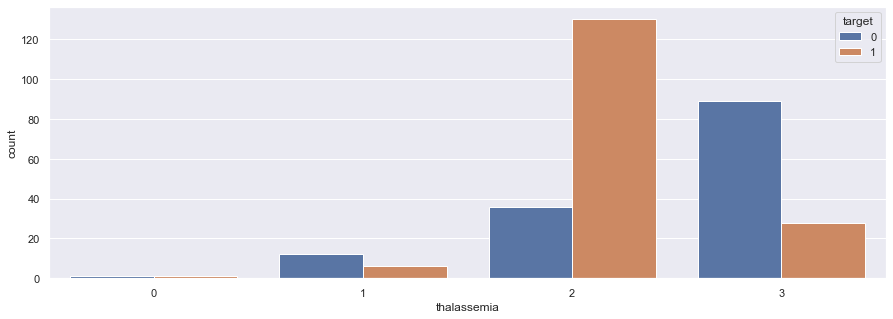

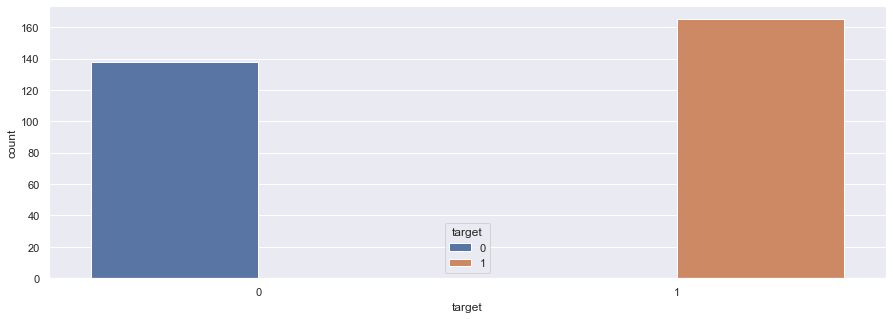

In [11]:
# looping through all columns except the target col
for col in df.columns:
    #plot size
    plt.figure(figsize=(15,5))
    sns.countplot(data = df, x = col ,hue = df.columns[-1])

<u>Splitting of X and Y variables</u>

In [12]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [13]:
X.shape

(303, 13)

In [14]:
Y.shape

(303,)

In [15]:
Y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [16]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [17]:
def scale_data(X):
    scaler.fit(X)
    X = scaler.transform(X)
    return X

In [18]:
X = scale_data(X)

### Evaluation Matrix

Common block of code for evaluating the model

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve,auc
def evaluation(Y_test,Y_pred, plot_prediction,plot_ROC):
    

    cfm=confusion_matrix(Y_test,Y_pred)
    print("Confusion Metrics :\n",cfm)

    print("\n")
    print(pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    
    print("\nClassification report: \n")

    print(classification_report(Y_test,Y_pred))

    acc=accuracy_score(Y_test, Y_pred) #
    print("\nAccuracy of the model: ",acc)
    print('\n----- YTest v Y pred (30 values)---------')
    print('YTest :',Y_test.values[0:31])
    print('YPred :',Y_pred[0:31])
    fpr, tpr, z = roc_curve(Y_test, Y_pred)
    area_under_curve= auc(fpr,tpr)
    print("\nAUC : ",area_under_curve)
    

    if plot_ROC : 
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr,tpr, 'b', label = area_under_curve)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()
    
    if plot_prediction :
        plt.figure(figsize=(25,6))
        plt.title('Y_test v Y_pred for first 40 values')
        plt.plot(Y_test.values[0:41], label='Actual', linestyle='--', marker='o', color='g')
        plt.plot(Y_pred[0:41], label='Predicted', linestyle='--', marker='o', color='r')
        plt.legend(prop={'size': 20})
        plt.show()
        
    return acc,area_under_curve

#### Splitting the data into train and TEst

In [20]:
# Splitting the data in 70:30
from sklearn.model_selection import train_test_split

def split_train_test(X,Y):
    #Split the data into test and train using stratified :: equal proportion of target class 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)
    print('shape of X_train :: ',X_train.shape)
    print('shape of Y_train :: ',Y_train.shape, '\nValue Counts \n', Y_train.value_counts())
    print('shape of X_test :: ',X_test.shape)
    print('shape of Y_test :: ',Y_test.shape, '\nValue Counts \n', Y_test.value_counts())
    return X_train, X_test, Y_train, Y_test

In [21]:
X_train, X_test, Y_train, Y_test = split_train_test(X,Y)

shape of X_train ::  (242, 13)
shape of Y_train ::  (242,) 
Value Counts 
 1    139
0    103
Name: target, dtype: int64
shape of X_test ::  (61, 13)
shape of Y_test ::  (61,) 
Value Counts 
 0    35
1    26
Name: target, dtype: int64


Importing the models that we would test

!pip install xgboost

pip install catboost 

In [22]:
#imports

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

In [23]:
models = []

#Logistic & its tuning
models.append(['Logistic Regression',LogisticRegression(random_state=100)])
models.append(['RidgeClassifier',RidgeClassifier(random_state=100)])
models.append(['SGDClassifier',SGDClassifier(loss='log', alpha=0.0001, max_iter=1000, shuffle=True, random_state=100, learning_rate='constant', eta0=0.00001, early_stopping=True, n_iter_no_change=5,)])

#KNN
models.append(['KNeigbors',KNeighborsClassifier(n_neighbors=int(np.sqrt(X_train.shape[0])))])

#SVM             
models.append(['SVM',SVC(kernel = 'rbf' ,C = 1, random_state=100)])

#DecisionTree
models.append(['DecisionTree',DecisionTreeClassifier(random_state=100)])

#Bagging
models.append(['RandomForest',RandomForestClassifier(random_state=100)])
models.append(['ExtraTreesClassifier',ExtraTreesClassifier(random_state=100)])
     
#Boosting
models.append(['XGBClassifier',XGBClassifier(random_state=100)])
models.append(['AdaBoostClassifier',AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=30)])
models.append(['CatBoostClassifier', CatBoostClassifier(eval_metric = 'AUC', verbose = 0)])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier()])

#Naive Bayes
models.append(['GaussianNB',GaussianNB()])


----------------------Logistic Regression---------------------------
Confusion Metrics :
 [[26  9]
 [ 5 21]]


Predicted   0   1  All
True                  
0          26   9   35
1           5  21   26
All        31  30   61

Classification report: 

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        35
           1       0.70      0.81      0.75        26

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61


Accuracy of the model:  0.7704918032786885

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.7752747252747253


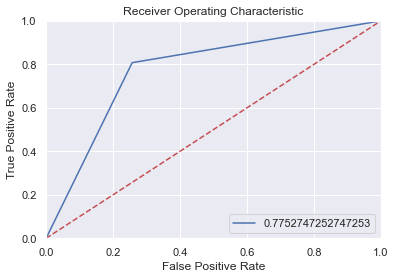

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.8353741496598639

----------------------RidgeClassifier---------------------------
Confusion Metrics :
 [[25 10]
 [ 5 21]]


Predicted   0   1  All
True                  
0          25  10   35
1           5  21   26
All        30  31   61

Classification report: 

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        35
           1       0.68      0.81      0.74        26

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.77      0.75      0.76        61


Accuracy of the model:  0.7540983606557377

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.7609890109890111


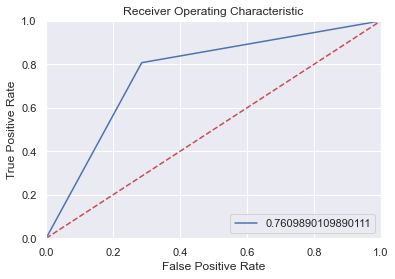

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.8386054421768707

----------------------SGDClassifier---------------------------
Confusion Metrics :
 [[26  9]
 [ 3 23]]


Predicted   0   1  All
True                  
0          26   9   35
1           3  23   26
All        29  32   61

Classification report: 

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        35
           1       0.72      0.88      0.79        26

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61


Accuracy of the model:  0.8032786885245902

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.8137362637362637


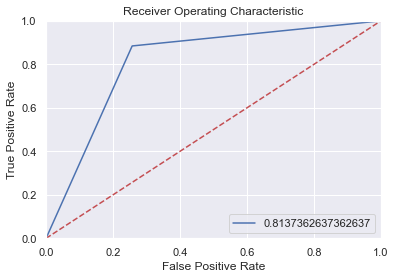

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.8395408163265305

----------------------KNeigbors---------------------------
Confusion Metrics :
 [[26  9]
 [ 3 23]]


Predicted   0   1  All
True                  
0          26   9   35
1           3  23   26
All        29  32   61

Classification report: 

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        35
           1       0.72      0.88      0.79        26

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61


Accuracy of the model:  0.8032786885245902

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.8137362637362637


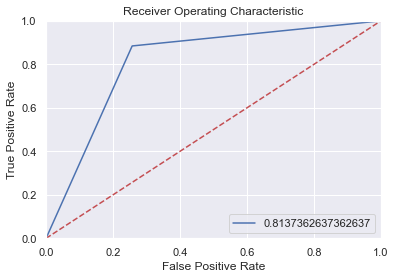

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.8347789115646258

----------------------SVM---------------------------
Confusion Metrics :
 [[27  8]
 [ 3 23]]


Predicted   0   1  All
True                  
0          27   8   35
1           3  23   26
All        30  31   61

Classification report: 

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        35
           1       0.74      0.88      0.81        26

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61


Accuracy of the model:  0.819672131147541

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.828021978021978


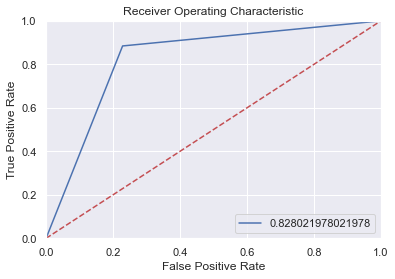

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.8387755102040817

----------------------DecisionTree---------------------------
Confusion Metrics :
 [[25 10]
 [ 3 23]]


Predicted   0   1  All
True                  
0          25  10   35
1           3  23   26
All        28  33   61

Classification report: 

              precision    recall  f1-score   support

           0       0.89      0.71      0.79        35
           1       0.70      0.88      0.78        26

    accuracy                           0.79        61
   macro avg       0.79      0.80      0.79        61
weighted avg       0.81      0.79      0.79        61


Accuracy of the model:  0.7868852459016393

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.7994505494505495


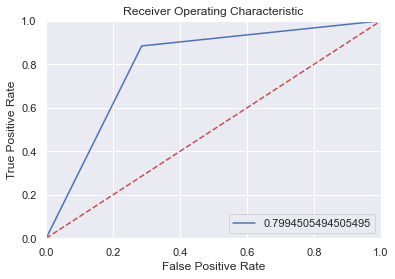

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.7226190476190475
Model could be over fitting

----------------------RandomForest---------------------------
Confusion Metrics :
 [[28  7]
 [ 5 21]]


Predicted   0   1  All
True                  
0          28   7   35
1           5  21   26
All        33  28   61

Classification report: 

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.75      0.81      0.78        26

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61


Accuracy of the model:  0.8032786885245902

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.803846153846154


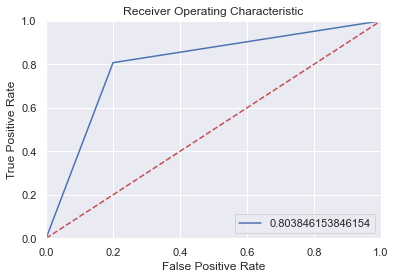

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.84328231292517

----------------------ExtraTreesClassifier---------------------------
Confusion Metrics :
 [[28  7]
 [ 5 21]]


Predicted   0   1  All
True                  
0          28   7   35
1           5  21   26
All        33  28   61

Classification report: 

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.75      0.81      0.78        26

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61


Accuracy of the model:  0.8032786885245902

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.803846153846154


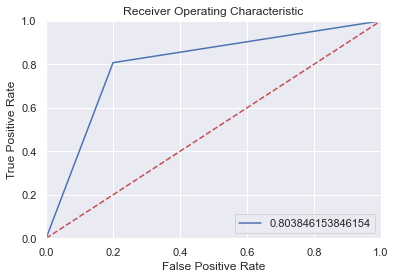

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.842687074829932

----------------------XGBClassifier---------------------------
[19:52:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Metrics :
 [[29  6]
 [ 5 21]]


Predicted   0   1  All
True                  
0          29   6   35
1           5  21   26
All        34  27   61

Classification report: 

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.78      0.81      0.79        26

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Accuracy

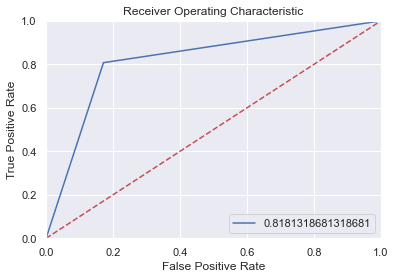

----------------------{K-Fold Mean}---------------------------
[19:52:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:

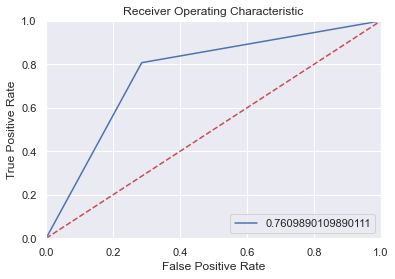

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.7558673469387756

----------------------CatBoostClassifier---------------------------
Confusion Metrics :
 [[29  6]
 [ 5 21]]


Predicted   0   1  All
True                  
0          29   6   35
1           5  21   26
All        34  27   61

Classification report: 

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.78      0.81      0.79        26

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Accuracy of the model:  0.819672131147541

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.8181318681318681


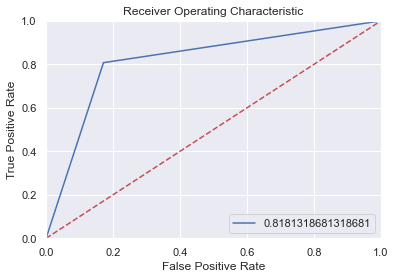

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.8430272108843537

----------------------GradientBoostingClassifier---------------------------
Confusion Metrics :
 [[28  7]
 [ 5 21]]


Predicted   0   1  All
True                  
0          28   7   35
1           5  21   26
All        33  28   61

Classification report: 

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.75      0.81      0.78        26

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61


Accuracy of the model:  0.8032786885245902

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1]

AUC :  0.803846153846154


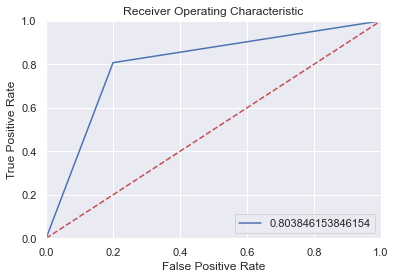

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.7971938775510204

----------------------GaussianNB---------------------------
Confusion Metrics :
 [[28  7]
 [ 6 20]]


Predicted   0   1  All
True                  
0          28   7   35
1           6  20   26
All        34  27   61

Classification report: 

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.74      0.77      0.75        26

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Accuracy of the model:  0.7868852459016393

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.7846153846153847


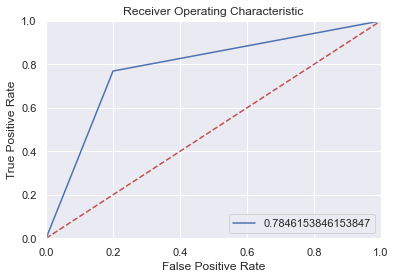

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.8136054421768707


In [24]:
list1 = []
for m in range(len(models)):
    list2 = []
    print(f'\n----------------------{models[m][0]}---------------------------')
    model = models[m][1]
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    acc,area_under_curve = evaluation(Y_test,Y_pred, False,True)
    
    print('----------------------{K-Fold Mean}---------------------------')
    #Using cross validation
    classifier = models[m][1]

    #performing kfold_cross_validation
    
    kfold_cv=StratifiedKFold(n_splits=5, shuffle=True)  
    #running the model using scoring metric as accuracy
    kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,y=Y_train, cv=kfold_cv)
    #print("\nkfold_cv_result : ",kfold_cv_result)
    #finding the mean
    kfold_mean  = kfold_cv_result.mean()
    print("kfold_cv_result.mean() : ",kfold_mean)
    
    fit = 'Good_fit'
    if (kfold_mean*100 - acc*100) <= -5 :
        fit = 'Over_fit'
        print('Model could be over fitting')
        
    list2.append(models[m][0])
    list2.append(acc)
    list2.append(kfold_mean)
    list2.append(area_under_curve)
    list2.append(fit)
    list1.append(list2)

In [25]:
df2 = pd.DataFrame(list1,columns=['Model','Accuracy','K-Fold Mean Accuracy','ROC_AUC', 'Model_Fit'])
df2.sort_values(by=['K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2.reset_index(inplace = True, drop = True)
df2

,Model,Accuracy,K-Fold Mean Accuracy,ROC_AUC,Model_Fit
0,RandomForest,0.803279,0.843282,0.803846,Good_fit
1,CatBoostClassifier,0.819672,0.843027,0.818132,Good_fit
2,ExtraTreesClassifier,0.803279,0.842687,0.803846,Good_fit
3,SGDClassifier,0.803279,0.839541,0.813736,Good_fit
4,SVM,0.819672,0.838776,0.828022,Good_fit
5,RidgeClassifier,0.754098,0.838605,0.760989,Good_fit
6,Logistic Regression,0.770492,0.835374,0.775275,Good_fit
7,KNeigbors,0.803279,0.834779,0.813736,Good_fit
8,XGBClassifier,0.819672,0.817517,0.818132,Good_fit
9,GaussianNB,0.786885,0.813605,0.784615,Good_fit


    As per the above table we see that SVM, GaussianNb, Random Forest and KNN have a good fit on the data with CV - accuracy score of 0.8 +
    
    Decision tree is overfitting the model as we see the CV score has decreased.
    As we have Random forest in top three we shall tune Random forestas it is a bagged version of decision tree.
    
    We shall also tune KNN and SVM for best hyperparameter using gridSearchCV

#### Tuning KNN

In [26]:
# Generic Code Block

neighbors = np.arange(1,int(np.sqrt(X_train.shape[0]))+1)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
my_dict = {}

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, metric="manhattan")
    
    #Fit the model
    knn.fit(X_train, Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test)
    
    #Predict 
    Y_pred = knn.predict(X_test)
    
    # Zipping Accuracy score
    my_dict[k]=accuracy_score(Y_test,Y_pred)
    
print(my_dict)

{1: 0.7704918032786885, 2: 0.8032786885245902, 3: 0.819672131147541, 4: 0.8524590163934426, 5: 0.8524590163934426, 6: 0.8688524590163934, 7: 0.819672131147541, 8: 0.8360655737704918, 9: 0.8032786885245902, 10: 0.8360655737704918, 11: 0.8360655737704918, 12: 0.8524590163934426, 13: 0.8360655737704918, 14: 0.8360655737704918, 15: 0.819672131147541}


    We see number of neighbor as 6 is giving a high accuracy. 
    We shall try with both 5 and 6 along with cross validation to see how it works

#### Tuning Random Forest

Parameters for Random Forest using GridSearchCV

In [27]:
randomForest_model = RandomForestClassifier(random_state=10)
parameter_space = { 'n_estimators': range(50,200,10), 'criterion': ['gini', 'entropy'], 'max_depth' : range(3,12) } 
clf = GridSearchCV(randomForest_model, parameter_space, n_jobs=-1, cv=5) 
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 12),
                         'n_estimators': range(50, 200, 10)})

In [28]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 100}


#### Tuning SVM

In [29]:
svc_model = SVC(random_state=100)
parameter_space = { 'kernel': ['rbf', 'sigmoid'], 'C' : [1,2,9,10] , 'gamma' :  [ 'scale', 'auto'] } 
clf = GridSearchCV(svc_model, parameter_space, n_jobs=-1, cv=5) 
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=100), n_jobs=-1,
             param_grid={'C': [1, 2, 9, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']})

In [30]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'C': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [31]:
adaboost_model = AdaBoostClassifier(random_state=100)
parameter_space = { 'n_estimators': range(10,200,10) , 'base_estimator' : [GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(criterion='gini', max_depth = 9, random_state=100), SVC(gamma = 'scale' ,kernel = 'sigmoid' ,C = 2, random_state=100) ] } 
clf = GridSearchCV(adaboost_model, parameter_space, n_jobs=-1, cv=5) 
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=100), n_jobs=-1,
             param_grid={'base_estimator': [GaussianNB(),
                                            DecisionTreeClassifier(),
                                            RandomForestClassifier(max_depth=9,
                                                                   random_state=100),
                                            SVC(C=2, kernel='sigmoid',
                                                random_state=100)],
                         'n_estimators': range(10, 200, 10)})

In [32]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'base_estimator': RandomForestClassifier(max_depth=9, random_state=100), 'n_estimators': 10}


In [46]:
models = []

#KNN
models.append(['KNeigbors-5',KNeighborsClassifier(n_neighbors=5)])
models.append(['KNeigbors-6',KNeighborsClassifier(n_neighbors=6)])

#SVM             
models.append(['SVM-1',SVC(gamma = 0.1 ,kernel = 'sigmoid' ,C = 1, random_state=100)])
models.append(['SVM-2',SVC(gamma = 'scale' ,kernel = 'sigmoid' ,C = 1, random_state=100)])

#Bagging
models.append(['RandomForest',RandomForestClassifier(bootstrap=True, criterion='gini', max_depth = 9, random_state=100)])
models.append(['ExtraTreesClassifier',ExtraTreesClassifier(bootstrap=True, random_state=100,max_depth = 9)])
     
#Boosting
models.append(['AdaBoostClassifier-RandomForest',AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=9, random_state=100))])



----------------------KNeigbors-5---------------------------
Confusion Metrics :
 [[28  7]
 [ 2 24]]


Predicted   0   1  All
True                  
0          28   7   35
1           2  24   26
All        30  31   61

Classification report: 

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        35
           1       0.77      0.92      0.84        26

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61


Accuracy of the model:  0.8524590163934426

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.8615384615384616


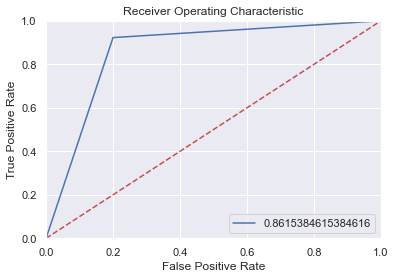

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.813265306122449

----------------------KNeigbors-6---------------------------
Confusion Metrics :
 [[28  7]
 [ 4 22]]


Predicted   0   1  All
True                  
0          28   7   35
1           4  22   26
All        32  29   61

Classification report: 

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.76      0.85      0.80        26

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61


Accuracy of the model:  0.819672131147541

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.8230769230769232


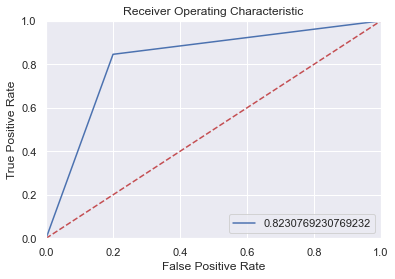

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.8183673469387756

----------------------SVM-1---------------------------
Confusion Metrics :
 [[26  9]
 [ 4 22]]


Predicted   0   1  All
True                  
0          26   9   35
1           4  22   26
All        30  31   61

Classification report: 

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        35
           1       0.71      0.85      0.77        26

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61


Accuracy of the model:  0.7868852459016393

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.7945054945054945


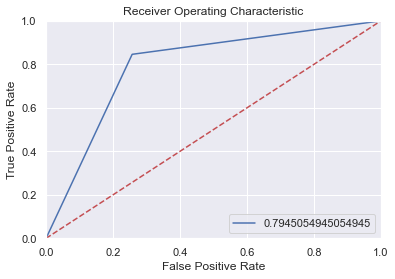

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.7976190476190476

----------------------SVM-2---------------------------
Confusion Metrics :
 [[25 10]
 [ 4 22]]


Predicted   0   1  All
True                  
0          25  10   35
1           4  22   26
All        29  32   61

Classification report: 

              precision    recall  f1-score   support

           0       0.86      0.71      0.78        35
           1       0.69      0.85      0.76        26

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61


Accuracy of the model:  0.7704918032786885

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.7802197802197803


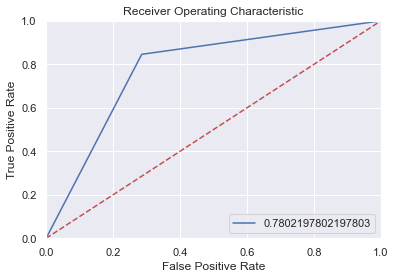

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.8261904761904763

----------------------RandomForest---------------------------
Confusion Metrics :
 [[27  8]
 [ 5 21]]


Predicted   0   1  All
True                  
0          27   8   35
1           5  21   26
All        32  29   61

Classification report: 

              precision    recall  f1-score   support

           0       0.84      0.77      0.81        35
           1       0.72      0.81      0.76        26

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61


Accuracy of the model:  0.7868852459016393

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.7895604395604396


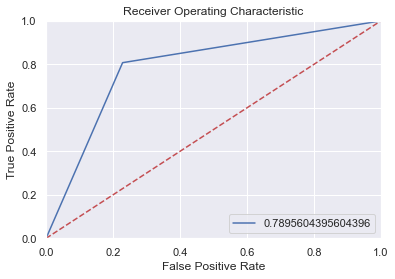

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.8512755102040817

----------------------ExtraTreesClassifier---------------------------
Confusion Metrics :
 [[27  8]
 [ 4 22]]


Predicted   0   1  All
True                  
0          27   8   35
1           4  22   26
All        31  30   61

Classification report: 

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.73      0.85      0.79        26

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61


Accuracy of the model:  0.8032786885245902

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.8087912087912088


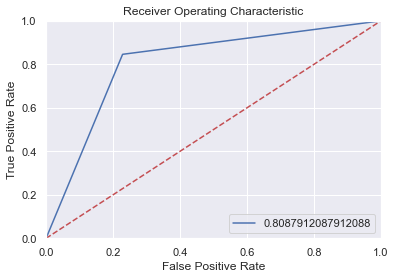

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.8262755102040817

----------------------AdaBoostClassifier-RandomForest---------------------------
Confusion Metrics :
 [[28  7]
 [ 5 21]]


Predicted   0   1  All
True                  
0          28   7   35
1           5  21   26
All        33  28   61

Classification report: 

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.75      0.81      0.78        26

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61


Accuracy of the model:  0.8032786885245902

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1]
YPred : [0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]

AUC :  0.803846153846154


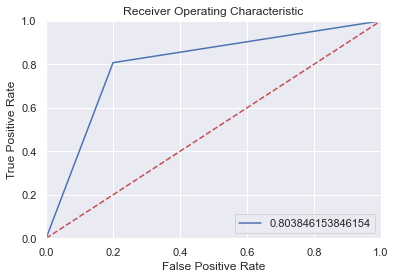

----------------------{K-Fold Mean}---------------------------
kfold_cv_result.mean() :  0.8264455782312925


In [47]:
list1 = []
for m in range(len(models)):
    list2 = []
    print(f'\n----------------------{models[m][0]}---------------------------')
    model = models[m][1]
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    acc,area_under_curve = evaluation(Y_test,Y_pred, False,True)
    
    print('----------------------{K-Fold Mean}---------------------------')
    #Using cross validation
    classifier = models[m][1]

    #performing kfold_cross_validation
    
    kfold_cv=StratifiedKFold(n_splits=5, shuffle=True)  
    #running the model using scoring metric as accuracy
    kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,y=Y_train, cv=kfold_cv)
    #print("\nkfold_cv_result : ",kfold_cv_result)
    #finding the mean
    kfold_mean  = kfold_cv_result.mean()
    print("kfold_cv_result.mean() : ",kfold_mean)
    
    fit = 'Good_fit'
    if (kfold_mean*100 - acc*100) <= -5 :
        fit = 'Over_fit'
        print('Model could be over fitting')
        
    list2.append(models[m][0])
    list2.append(acc)
    list2.append(kfold_mean)
    list2.append(area_under_curve)
    list2.append(fit)
    list1.append(list2)

In [35]:
df2

,Model,Accuracy,K-Fold Mean Accuracy,ROC_AUC,Model_Fit
0,RandomForest,0.803279,0.843282,0.803846,Good_fit
1,CatBoostClassifier,0.819672,0.843027,0.818132,Good_fit
2,ExtraTreesClassifier,0.803279,0.842687,0.803846,Good_fit
3,SGDClassifier,0.803279,0.839541,0.813736,Good_fit
4,SVM,0.819672,0.838776,0.828022,Good_fit
5,RidgeClassifier,0.754098,0.838605,0.760989,Good_fit
6,Logistic Regression,0.770492,0.835374,0.775275,Good_fit
7,KNeigbors,0.803279,0.834779,0.813736,Good_fit
8,XGBClassifier,0.819672,0.817517,0.818132,Good_fit
9,GaussianNB,0.786885,0.813605,0.784615,Good_fit


In [48]:
df3 = pd.DataFrame(list1,columns=['Model','Accuracy','K-Fold Mean Accuracy','ROC_AUC', 'Model_Fit'])
df3.sort_values(by=[ 'K-Fold Mean Accuracy'],inplace=True,ascending=False)
df3.reset_index(inplace = True, drop = True)
df3

,Model,Accuracy,K-Fold Mean Accuracy,ROC_AUC,Model_Fit
0,RandomForest,0.786885,0.851276,0.789560,Good_fit
1,AdaBoostClassifier-RandomForest,0.803279,0.826446,0.803846,Good_fit
2,ExtraTreesClassifier,0.803279,0.826276,0.808791,Good_fit
3,SVM-2,0.770492,0.826190,0.780220,Good_fit
4,KNeigbors-6,0.819672,0.818367,0.823077,Good_fit
5,KNeigbors-5,0.852459,0.813265,0.861538,Good_fit
6,SVM-1,0.786885,0.797619,0.794505,Good_fit


Top performing model is RandomForest and then AdaBoostClassifier-RandomForest. as they are not over fitting the dataset and doing a better job and hence enhancing Decision Tree